### Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import time

### Load, Preprocess and Display Dataset

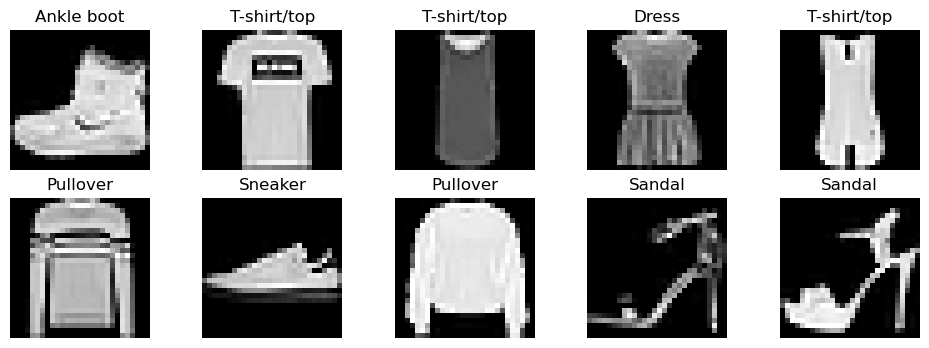

In [13]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Number of images to display
num_images = 10

# Plot images with labels
plt.figure(figsize=(12, 4))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

### Define CNN Model Function

In [4]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    return model

### Training with Different Optimizers

In [5]:
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Adam': tf.keras.optimizers.Adam(),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adagrad': tf.keras.optimizers.Adagrad()
}

results = {}

for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer:")
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)
    elapsed_time = time.time() - start_time
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
    y_pred = np.argmax(model.predict(x_test), axis=1)
    
    results[name] = {
        'model': model,
        'history': history,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'y_pred': y_pred,
        'elapsed_time': elapsed_time
    }
    print(f"{name} - Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}, Time: {elapsed_time:.2f}s\n")

Training with SGD optimizer:
Epoch 1/10
375/375 [==============================] - 35s 91ms/step - loss: 1.5897 - accuracy: 0.4357 - val_loss: 0.9243 - val_accuracy: 0.6726
Epoch 2/10
375/375 [==============================] - 32s 85ms/step - loss: 0.9110 - accuracy: 0.6646 - val_loss: 0.7533 - val_accuracy: 0.7209
Epoch 3/10
375/375 [==============================] - 31s 83ms/step - loss: 0.7816 - accuracy: 0.7092 - val_loss: 0.6701 - val_accuracy: 0.7547
Epoch 4/10
375/375 [==============================] - 31s 82ms/step - loss: 0.7111 - accuracy: 0.7360 - val_loss: 0.6301 - val_accuracy: 0.7664
Epoch 5/10
375/375 [==============================] - 32s 84ms/step - loss: 0.6658 - accuracy: 0.7507 - val_loss: 0.5931 - val_accuracy: 0.7762
Epoch 6/10
375/375 [==============================] - 33s 89ms/step - loss: 0.6304 - accuracy: 0.7639 - val_loss: 0.5652 - val_accuracy: 0.7855
Epoch 7/10
375/375 [==============================] - 34s 91ms/step - loss: 0.6027 - accuracy: 0.7732 - val

### Visualization and Performance Evaluation

### Plot Accuracy and Loss Graph

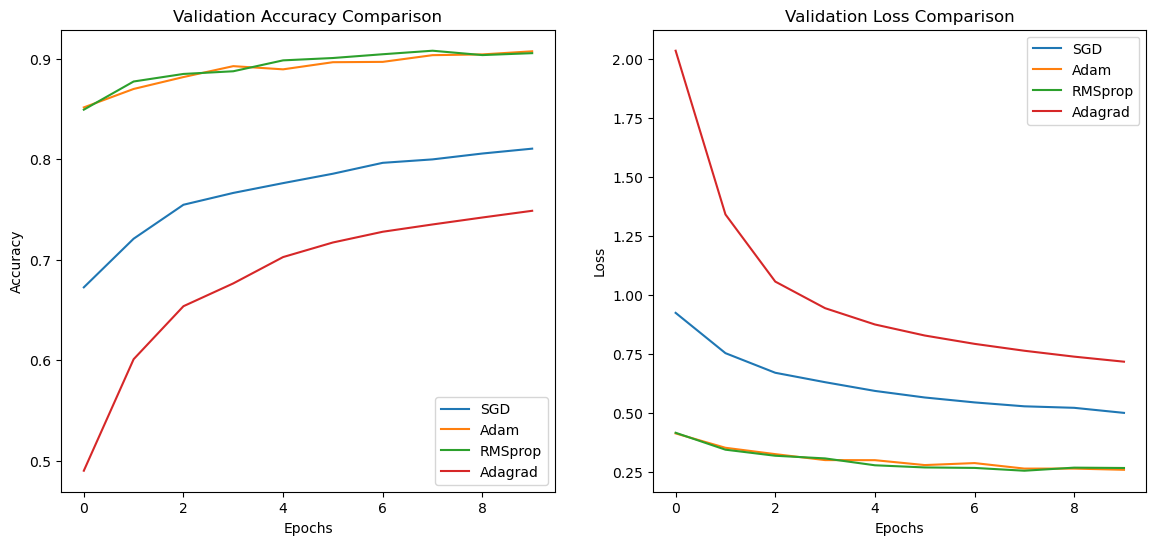

In [8]:
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
for name in results:
    plt.plot(results[name]['history'].history['val_accuracy'], label=f'{name}')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
for name in results:
    plt.plot(results[name]['history'].history['val_loss'], label=f'{name}')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot Confusion Matrix for Each Optimizer

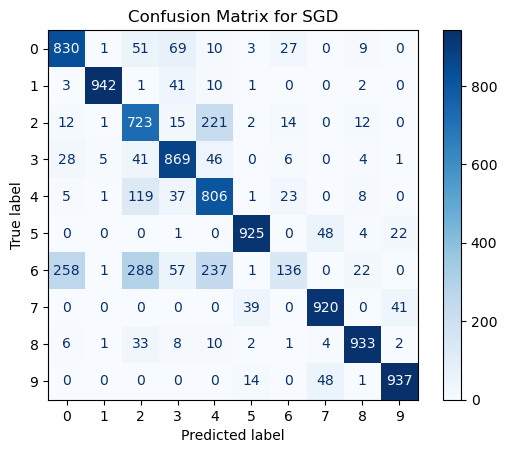

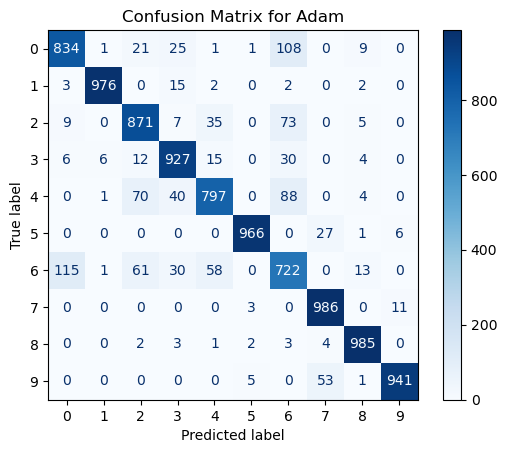

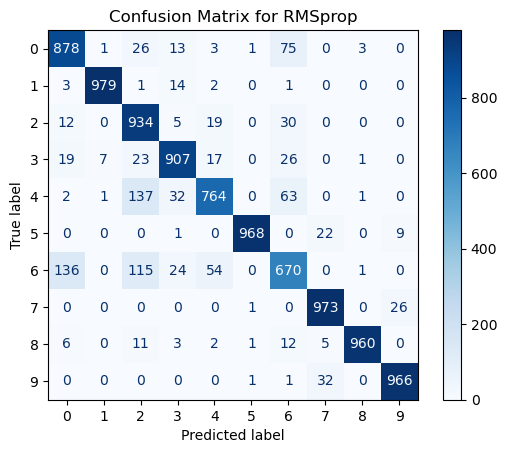

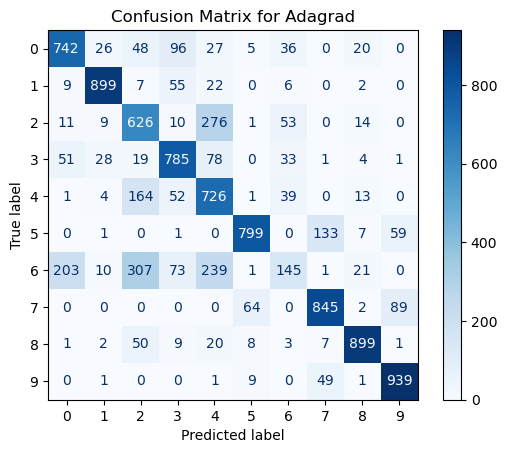

In [9]:
for name in results:
    cm = confusion_matrix(y_test, results[name]['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

### Print Testing Images with Model Predictions

Sample Predictions using SGD:


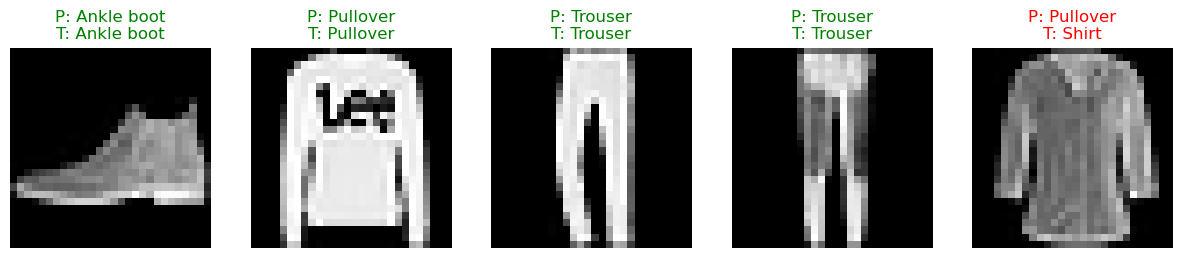

Sample Predictions using Adam:


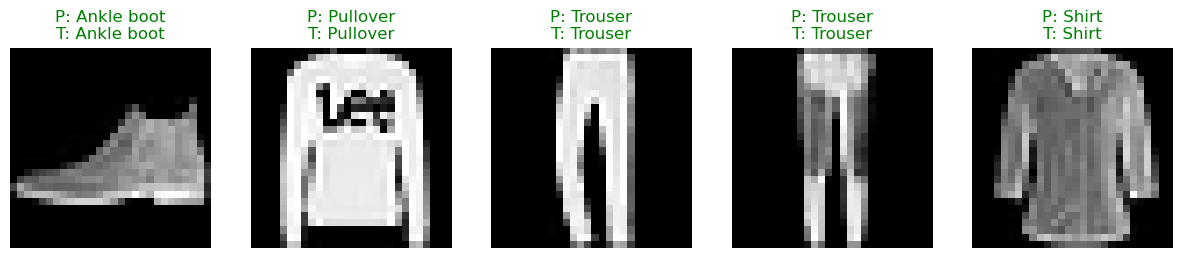

Sample Predictions using RMSprop:


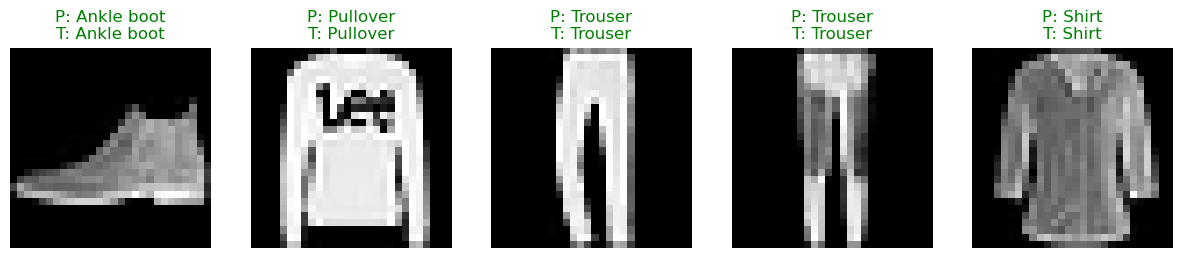

Sample Predictions using Adagrad:


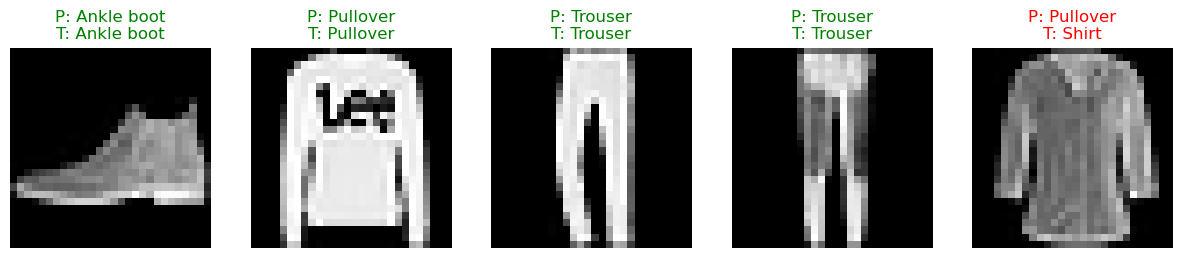

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_images = 5  # Number of test images to display

for name in results:
    print(f"Sample Predictions using {name}:")
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        pred_label = class_names[results[name]['y_pred'][i]]
        true_label = class_names[y_test[i]]
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"P: {pred_label}\nT: {true_label}", color=color)
        plt.axis('off')
    plt.show()

### Summary of Results Table

In [11]:
import pandas as pd

summary_data = {
    'Optimizer': [],
    'Test Accuracy': [],
    'Test Loss': [],
    'Training Time (s)': []
}

for name in results:
    summary_data['Optimizer'].append(name)
    summary_data['Test Accuracy'].append(round(results[name]['test_accuracy'], 4))
    summary_data['Test Loss'].append(round(results[name]['test_loss'], 4))
    summary_data['Training Time (s)'].append(round(results[name]['elapsed_time'], 2))

df_summary = pd.DataFrame(summary_data)
print("\nPerformance Summary:\n")
print(df_summary)


Performance Summary:

  Optimizer  Test Accuracy  Test Loss  Training Time (s)
0       SGD         0.8021     0.5208             324.38
1      Adam         0.9005     0.2768             327.94
2   RMSprop         0.8999     0.2838             318.17
3   Adagrad         0.7405     0.7432             316.24
